In [2]:
import os
import sys
import os
from PIL import Image,ImageChops,ImageEnhance
def ela_image(path, quality=98):
    temp_filename = 'temp_file_name.jpg'
    ela_filename = 'temp_ela.png' 
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)
    ela_image = ImageChops.difference(image, temp_image)
    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff 
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)  
    return ela_image

In [3]:
Real_image_path='/kaggle/input/casia-dataset/casia/CASIA2/Au/Au_arc_30446.jpg'
Fake_image_path1='../input/casia-dataset/CASIA2/Tp/Tp_D_CND_M_N_ani00018_sec00096_00138.tif'
Fake_image_path2='/kaggle/input/casia-dataset/casia/CASIA1/Sp/Sp_D_NRN_A_sec0047_cha0007_0559.jpg'

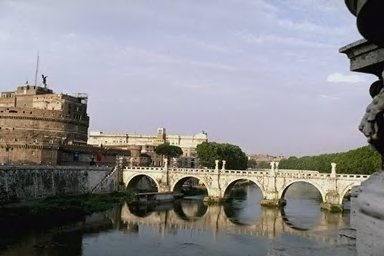

In [4]:
Image.open(Real_image_path)

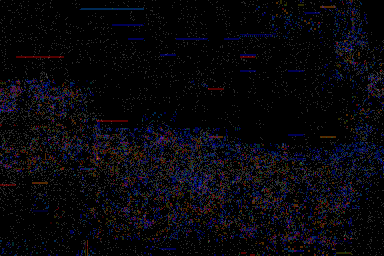

In [5]:
ela_image(Real_image_path)

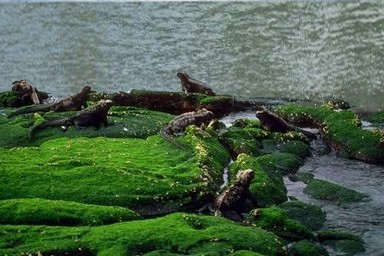

In [6]:
Image.open(Fake_image_path1)

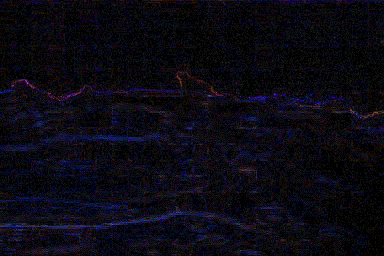

In [7]:
ela_image(Fake_image_path1)

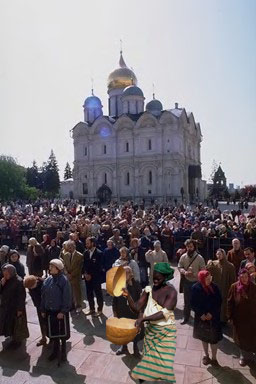

In [8]:
Image.open(Fake_image_path2)

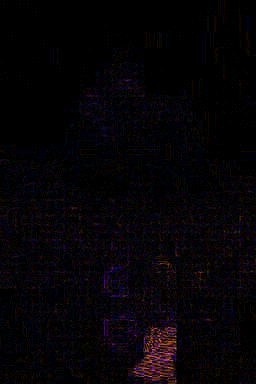

In [9]:
ela_image(Fake_image_path2)

In [10]:
image_size=(128,128)

In [ ]:
import cv2  # Import OpenCV


In [11]:
def preprocessing(image_path):
    image_size = (128, 128)  # Define the target size for resizing
    image = cv2.imread(image_path)  # Read the image using OpenCV
    image = cv2.resize(image, image_size)  # Resize the image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image = image.flatten() / 255.0  # Flatten the image and normalize
    return np.array(image)

In [13]:
X=[]
Y=[]

In [14]:
import random
path = '/kaggle/input/casia-dataset/CASIA2/Au/'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('jpg') or filename.endswith('png'):
            full_path = os.path.join(dirname, filename)
            X.append(preprocessing(full_path))
            Y.append(1)
random.shuffle(X)
X = X[:2100]
Y = Y[:2100]
print(len(X), len(Y))

2100 2100


In [15]:
len(X)

2100

In [16]:
path = '/kaggle/input/casia-dataset/CASIA2/Tp/'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('jpg') or filename.endswith('png'):
            full_path = os.path.join(dirname, filename)
            X.append(preprocessing(full_path))
            Y.append(0)
print(len(X), len(Y))

4164 4164


In [82]:
from keras.utils import to_categorical
X = np.array(X)
Y = to_categorical(Y, 2)
X = X.reshape(-1, 128, 128, 3)

In [83]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.2,random_state=10)
X = X.reshape(-1,1,1,1)
print(len(X_train), len(Y_train))
print(len(X_val), len(Y_val))

3331 3331
833 833


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Dropout, BatchNormalization,Maxp

def CNN():
    model = Sequential()
    model.add(Conv2D(filters=128, kernel_size=(5,5), activation='elu', padding='same', input_shape=(128,128,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))  # Now size is (64, 64, 128)
    
    model.add(Conv2D(filters=128, kernel_size=(5,5), activation='elu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))  # Now size is (32, 32, 128)
    
    model.add(Conv2D(filters=256, kernel_size=(5,5), activation='elu', padding='valid'))  # Now size is (28, 28, 256)
    model.add(MaxPooling2D(pool_size=(2,2)))  # Now size is (14, 14, 256)
    
    model.add(Conv2D(filters=128, kernel_size=(5,5), activation='elu', padding='valid'))  # Now size is (10, 10, 128)
    model.add(AveragePooling2D(pool_size=(2,2)))  # Now size is (5, 5, 128)
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='elu', padding='valid'))  # Reduced kernel size, now size is (3, 3, 64)
    model.add(AveragePooling2D(pool_size=(2,2), padding='same'))  # Ensure size stays valid, now size is (2, 2, 64)
    
    model.add(Flatten())  # Flatten the (2, 2, 64) tensor
    
    model.add(Dense(units=64, activation='elu'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    
    model.add(Dense(units=16, activation='elu'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    
    model.add(Dense(units=2, activation='softmax'))  # Final output layer
    
    return model


In [22]:
model1=CNN()
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 128)  │         9,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 128)    │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 5, 5, 128)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 2, 2, 64)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,149,874 (8.20 MB)

 Trainable params: 2,149,714 (8.20 MB)

 Non-trainable params: 160 (640.00 B)

In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

In [50]:
from tensorflow.keras.callbacks import EarlyStopping
earlystopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [51]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.9, 
                                            min_lr=0.00001)

In [52]:
# Hyperparameters
epochs = 30
batch_size = 40
init_lr = 1e-4

# Optimizer without decay (decay is handled via callback)
optimizer = Adam(learning_rate=init_lr)

# Compile the model
model1.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Callback for learning rate reduction
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6, verbose=1)

In [53]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images

datagen.fit(X_train)

In [54]:
# Fit the model
history = model1.fit(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = 120, validation_data = (X_val,Y_val),
                               steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction,earlystopping])

Epoch 1/120
83/83 ━━━━━━━━━━━━━━━━━━━━ 26s 230ms/step - accuracy: 0.9031 - loss: 0.3209 - val_accuracy: 0.9196 - val_loss: 0.2589 - learning_rate: 1.0000e-04
Epoch 2/120
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9000 - loss: 0.3107 - val_accuracy: 0.9208 - val_loss: 0.2560 - learning_rate: 1.0000e-04
Epoch 3/120
83/83 ━━━━━━━━━━━━━━━━━━━━ 15s 169ms/step - accuracy: 0.9218 - loss: 0.2881 - val_accuracy: 0.9172 - val_loss: 0.2362 - learning_rate: 1.0000e-04
Epoch 4/120
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9250 - loss: 0.2530 - val_accuracy: 0.9196 - val_loss: 0.2381 - learning_rate: 1.0000e-04
Epoch 5/120
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.9270 - loss: 0.2792
Epoch 5: ReduceLROnPlateau reducing learning rate to 8.999999772640876e-05.
83/83 ━━━━━━━━━━━━━━━━━━━━ 15s 165ms/step - accuracy: 0.9269 - loss: 0.2792 - val_accuracy: 0.9244 - val_loss: 0.2409 - learning_rate: 1.0000e-04
Epoch 6/120
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.

In [52]:
loss,accuracy=model.evaluate(X_val, Y_val)

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.4888 - loss: 1310.4634


In [53]:
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

/tmp/ipykernel_36/3384324420.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1) #horizontal,vertical,position


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


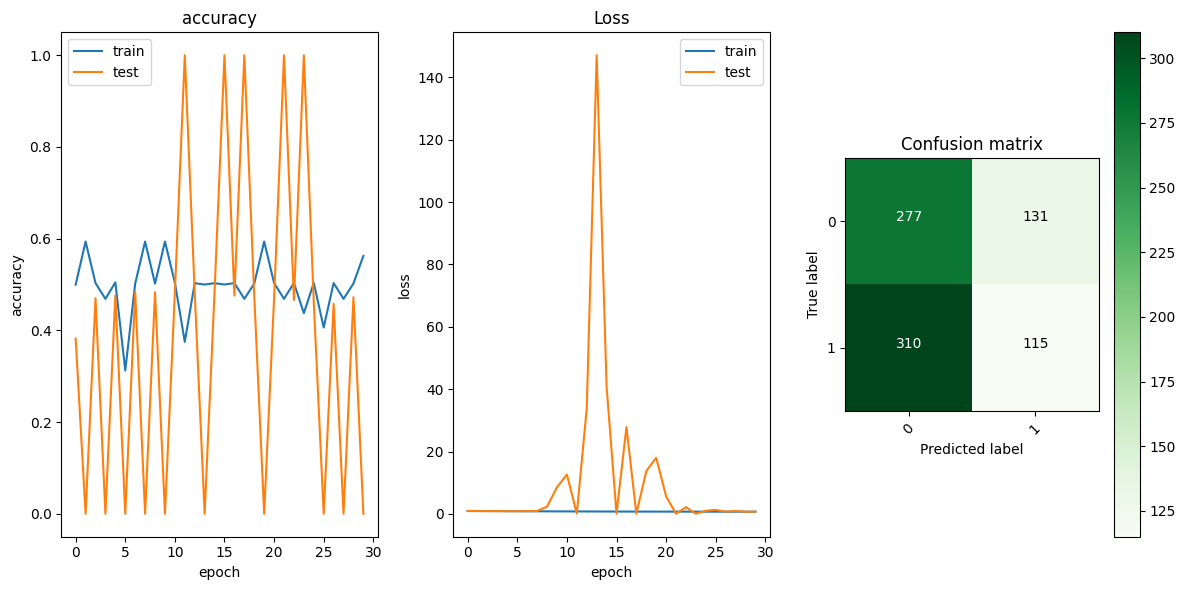

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

plt.subplots(figsize=(12, 6))
plt.subplot(1,3,1) #horizontal,vertical,position
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.subplot(1,3,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.subplot(1,3,3)
Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_val,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = range(2))
plt.show()

In [55]:
Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_val,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [56]:
confusion_mtx

array([[277, 131],
       [310, 115]])

### 

In [18]:
import tensorflow as tf


In [19]:
# Convert labels to categorical
Y = np.array(Y)
Y = tf.keras.utils.to_categorical(Y, 2)  # Ensure labels are one-hot encoded for 2 classes

# Reshape the data
X = np.array(X)
X = X.reshape(-1, 128, 128, 3)

In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

# Assuming X and Y are your data and labels
# X = np.array([...])  # Replace with your actual data
# Y = np.array([...])  # Replace with your actual labels

# Split the data
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=10)

# Define the model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # Initially freeze all layers

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='elu'),
    Dropout(0.7),
    BatchNormalization(),
    Dense(64, activation='elu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(2, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# Data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Create an iterator for training
train_iterator = datagen.flow(X_train, Y_train, batch_size=32)

# Validation generator without augmentation
val_datagen = ImageDataGenerator(rescale=1./255)
val_iterator = val_datagen.flow(X_val, Y_val, batch_size=32)

# Callbacks
earlystopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6, verbose=1)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)

# Train the model
history = model.fit(
    train_iterator,
    epochs=50,
    validation_data=val_iterator,
    steps_per_epoch=X_train.shape[0] // 32,
    callbacks=[reduce_lr, earlystopping, checkpoint]
)

# Unfreeze some layers of the base model for fine-tuning
base_model.trainable = True
fine_tune_at = 15  # Choose a layer to


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.4965 - loss: 1.0196
Epoch 1: val_loss improved from inf to 0.74278, saving model to best_model.keras
104/104 ━━━━━━━━━━━━━━━━━━━━ 24s 170ms/step - accuracy: 0.4965 - loss: 1.0197 - val_accuracy: 0.4898 - val_loss: 0.7428 - learning_rate: 1.0000e-04
Epoch 2/50
  1/104 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5312 - loss: 0.9272
Epoch 2: val_loss improved from 0.74278 to 0.74090, saving model to best_model.keras
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5312 - loss: 0.9272 - val_accuracy: 0.4898 - val_loss: 0.7409 - learning_rate: 1.0000e-04
Epoch 3/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.4842 - loss: 1.0260
Epoch 3: val_loss improved from 0.74090 to 0.69725, saving model to best_model.keras
104/104 ━━━━━━━━━━━━━━━━━━━━ 15s 139ms/step - accuracy: 0.4842 - loss: 1.0258 - val_accuracy: 0.5102 - val_loss: 0.6973 - learning_rate: 1.0000e-04
Epoch 4/50
  1/104 ━━━━━━━━━━━━━━━━━━━━ 2s 24

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

# Split the data
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=10)

# Define the model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # Initially freeze all layers

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.7),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(2, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# Data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Create an iterator for training
train_iterator = datagen.flow(X_train, Y_train, batch_size=32)

# Validation generator without augmentation
val_datagen = ImageDataGenerator(rescale=1./255)
val_iterator = val_datagen.flow(X_val, Y_val, batch_size=32)



# Train the model
history = model.fit(
    train_iterator,
    epochs=50,
    validation_data=val_iterator,
    steps_per_epoch=X_train.shape[0] // 32
)

# Unfreeze some layers of the base model for fine-tuning
base_model.trainable = True
fine_tune_at = 14  # Choose a layer to fine-tune


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_7      │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 35s 212ms/step - accuracy: 0.4917 - loss: 1.1032 - val_accuracy: 0.5102 - val_loss: 0.7012
Epoch 2/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2812 - loss: 1.2613 - val_accuracy: 0.5102 - val_loss: 0.7014
Epoch 3/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 15s 134ms/step - accuracy: 0.4753 - loss: 1.0783 - val_accuracy: 0.5102 - val_loss: 0.6931
Epoch 4/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5938 - loss: 0.8831 - val_accuracy: 0.5102 - val_loss: 0.6931
Epoch 5/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 15s 132ms/step - accuracy: 0.5174 - loss: 0.9847 - val_accuracy: 0.5102 - val_loss: 0.6929
Epoch 6/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5312 - loss: 1.0297 - val_accuracy: 0.5102 - val_loss: 0.6929
Epoch 7/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 20s 133ms/step - accuracy: 0.5084 - loss: 0.9438 - val_accuracy: 0.5102 - val_loss: 0.6934
Epoch 8/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6562 - loss: 0.7611 - val_

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, LearningRateScheduler, TensorBoard
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split

# Define the improved CNN model with regularization and residual connections
def improved_CNN():
    model = Sequential()

    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'valid', 
                 activation ='relu', input_shape = (128,128,3)))
    print("Input: ", model.input_shape)
    print("Output: ", model.output_shape)

    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'valid', 
                 activation ='relu'))
    print("Input: ", model.input_shape)
    print("Output: ", model.output_shape)

    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Dropout(0.25))
    print("Input: ", model.input_shape)
    print("Output: ", model.output_shape)

    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation = "softmax"))
    return model
# Cyclical Learning Rate function
def clr_scheduler(epoch, lr):
    base_lr = 1e-5
    max_lr = 1e-3
    step_size = 2000.0  # Number of iterations per cycle
    cycle = np.floor(1 + epoch / (2 * step_size))
    x = np.abs(epoch / step_size - 2 * cycle + 1)
    lr = base_lr + (max_lr - base_lr) * np.maximum(0, (1 - x))
    return lr

# Assuming X and Y are your data and labels
# X = np.array([...])  # Replace with your actual data
# Y = np.array([...])  # Replace with your actual labels

# Split the data
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=10)

# Define the model
model = improved_CNN()

# Compile the model with an adjusted learning rate
initial_learning_rate = 1e-4
model.compile(optimizer=Adam(learning_rate=initial_learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# Data augmentation with moderation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,  # Reduced further to minimize distortion
    width_shift_range=0.02,
    height_shift_range=0.02,
    shear_range=0.02,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],  # Adding brightness adjustment
    fill_mode='nearest'
)

# Create an iterator for training
train_iterator = datagen.flow(X_train, Y_train, batch_size=32)

# Validation generator without augmentation
val_datagen = ImageDataGenerator(rescale=1./255)
val_iterator = val_datagen.flow(X_val, Y_val, batch_size=32)

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7),
    ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True),
    LearningRateScheduler(clr_scheduler),  # Adding CLR
    TensorBoard(log_dir='./logs', histogram_freq=1)  # Adding TensorBoard callback
]

# Train the model
history = model.fit(
    train_iterator,
    epochs=30,
    validation_data=val_iterator,
    steps_per_epoch=len(X_train) // 32,  # Ensure these match the size of your data
    validation_steps=len(X_val) // 32,  # Ensure these match the size of your data
    callbacks=callbacks
)


NameError: name 'X' is not defined

In [62]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Input, Add
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, LearningRateScheduler, TensorBoard
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split

# Define the improved CNN model with regularization and residual connections
def improved_CNN():
    inputs = Input(shape=(128, 128, 3))
    
    # First Convolutional Block
    x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)
    
    # Residual Connection Block
    shortcut = Conv2D(filters=64, kernel_size=(1, 1), padding='same')(x)  # Projecting to match dimensions
    x = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Add()([x, shortcut])  # Adding residual connection
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)

    # Flattening and Dense Layers
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    
    # Output Layer
    outputs = Dense(2, activation='softmax')(x)
    
    # Define the Model
    model = Model(inputs, outputs)
    
    return model

# Cyclical Learning Rate function
def clr_scheduler(epoch, lr):
    base_lr = 1e-5
    max_lr = 1e-3
    step_size = 2000.0  # Number of iterations per cycle
    cycle = np.floor(1 + epoch / (2 * step_size))
    x = np.abs(epoch / step_size - 2 * cycle + 1)
    lr = base_lr + (max_lr - base_lr) * np.maximum(0, (1 - x))
    return lr

# Assuming X and Y are your data and labels
# X = np.array([...])  # Replace with your actual data
# Y = np.array([...])  # Replace with your actual labels

# Split the data
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=10)

# Define the model
model = improved_CNN()

# Compile the model with an adjusted learning rate
initial_learning_rate = 1e-4
model.compile(optimizer=Adam(learning_rate=initial_learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# Data augmentation with moderation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,  # Reduced further to minimize distortion
    width_shift_range=0.02,
    height_shift_range=0.02,
    shear_range=0.02,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],  # Adding brightness adjustment
    fill_mode='nearest'
)

# Create an iterator for training
train_iterator = datagen.flow(X_train, Y_train, batch_size=32)

# Validation generator without augmentation
val_datagen = ImageDataGenerator(rescale=1./255)
val_iterator = val_datagen.flow(X_val, Y_val, batch_size=32)



# Train the model
history = model.fit(
    train_iterator,
    epochs=30,
    validation_data=val_iterator,
    steps_per_epoch=len(X_train) // 32,  # Ensure these match the size of your data
    validation_steps=len(X_val) // 32  # Ensure these match the size of your data
)


Model: "functional_158"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_27      │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_47 (Conv2D)  │ (None, 124, 124,  │      2,432 │ input_layer_27[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 124, 124,  │        128 │ conv2d_47[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_48 (Conv2D)  │ (None, 120, 120,  │     25,632 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 120, 120,  │        128 │ conv2d_48[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_31    │ (None, 60, 60,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_38          │ (None, 60, 60,    │          0 │ max_pooling2d_31… │
│ (Dropout)           │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_50 (Conv2D)  │ (None, 60, 60,    │     18,496 │ dropout_38[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 60, 60,    │        256 │ conv2d_50[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_51 (Conv2D)  │ (None, 60, 60,    │     36,928 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 60, 60,    │        256 │ conv2d_51[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_49 (Conv2D)  │ (None, 60, 60,    │      2,112 │ dropout_38[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 60, 60,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ conv2d_49[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_32    │ (None, 30, 30,    │          0 │ add_2[0][0]       │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_39          │ (None, 30, 30,    │          0 │ max_pooling2d_32… │
│ (Dropout)           │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_10          │ (None, 57600)     │          0 │ dropout_39[0][0]  │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_51 (Dense)    │ (None, 256)       │ 14,745,856 │ flatten_10[0][0]

 Total params: 14,832,738 (56.58 MB)

 Trainable params: 14,832,354 (56.58 MB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 29s 193ms/step - accuracy: 0.5099 - loss: 0.6931 - val_accuracy: 0.5084 - val_loss: 0.6931
Epoch 2/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4062 - loss: 0.6932 - val_accuracy: 1.0000 - val_loss: 0.6929
Epoch 3/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 16s 145ms/step - accuracy: 0.4988 - loss: 0.6932 - val_accuracy: 0.4868 - val_loss: 0.6931
Epoch 4/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 129us/step - accuracy: 0.5312 - loss: 0.6931 - val_accuracy: 1.0000 - val_loss: 0.6920
Epoch 5/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 16s 146ms/step - accuracy: 0.5020 - loss: 0.6931 - val_accuracy: 0.4952 - val_loss: 0.6924
Epoch 6/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 123us/step - accuracy: 0.4688 - loss: 0.6932 - val_accuracy: 1.0000 - val_loss: 0.6914
Epoch 7/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 16s 145ms/step - accuracy: 0.5044 - loss: 0.6931 - val_accuracy: 0.4952 - val_loss: 0.6885
Epoch 8/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 153us/step - accuracy: 0.5000 - loss: 0.6931 

KeyboardInterrupt: 